<a href="https://colab.research.google.com/github/gholibqasobov/Tic-Tac-Toe-Playing-Robot/blob/main/tic_tac_toe_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q inference supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 839.6/839.6 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.9/891.9 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from google.colab import userdata
from inference import get_model


ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
MODEL_ID = 'tic-tac-toe-robot/1'

model = get_model(MODEL_ID, ROBOFLOW_API_KEY)

In [3]:
import cv2

IMAGE_PATH = '/content/5328094608330187857.jpg'
image = cv2.imread(IMAGE_PATH)

In [4]:
results = model.infer(image, confidence=0.4)[0]

In [5]:
results

ObjectDetectionInferenceResponse(visualization=None, inference_id=None, frame_id=None, time=None, image=InferenceResponseImage(width=960, height=1280), predictions=[ObjectDetectionPrediction(x=468.0, y=910.5, width=164.0, height=173.0, confidence=0.9901112914085388, class_name='empty', class_confidence=None, class_id=0, tracker_id=None, detection_id='18599f5a-1462-4124-9aa8-d3ba7149bbfa', parent_id=None), ObjectDetectionPrediction(x=647.0, y=914.0, width=172.0, height=174.0, confidence=0.9895465970039368, class_name='empty', class_confidence=None, class_id=0, tracker_id=None, detection_id='52a28923-d6ee-442d-a999-10be5eae7634', parent_id=None), ObjectDetectionPrediction(x=292.0, y=907.5, width=164.0, height=173.0, confidence=0.9817727208137512, class_name='empty', class_confidence=None, class_id=0, tracker_id=None, detection_id='b1e3afb2-fcb5-4cae-9378-9dd9ff18dd85', parent_id=None), ObjectDetectionPrediction(x=471.0, y=733.5, width=134.0, height=139.0, confidence=0.9638507962226868, c

In [6]:
import supervision as sv

detections = sv.Detections.from_inference(results)

In [8]:
detections

Detections(xyxy=array([[ 386.,  824.,  550.,  997.],
       [ 561.,  827.,  733., 1001.],
       [ 210.,  821.,  374.,  994.],
       [ 404.,  664.,  538.,  803.],
       [ 571.,  661.,  709.,  802.],
       [ 230.,  656.,  360.,  792.],
       [ 230.,  491.,  362.,  631.],
       [ 588.,  480.,  720.,  621.],
       [ 411.,  486.,  545.,  625.]]), mask=None, confidence=array([0.99011129, 0.9895466 , 0.98177272, 0.9638508 , 0.94718432,
       0.93949425, 0.93776608, 0.93729937, 0.90378046]), class_id=array([0, 0, 0, 2, 2, 2, 1, 1, 1]), tracker_id=None, data={'class_name': array(['empty', 'empty', 'empty', 'x', 'x', 'x', 'o', 'o', 'o'],
      dtype='<U5')})

In [9]:
annotated_image = image.copy()

annotated_image = sv.BoxAnnotator().annotate(
    scene=annotated_image,
    detections=detections,
)

annotated_image = sv.LabelAnnotator().annotate(
    scene=annotated_image,
    detections=detections,
)

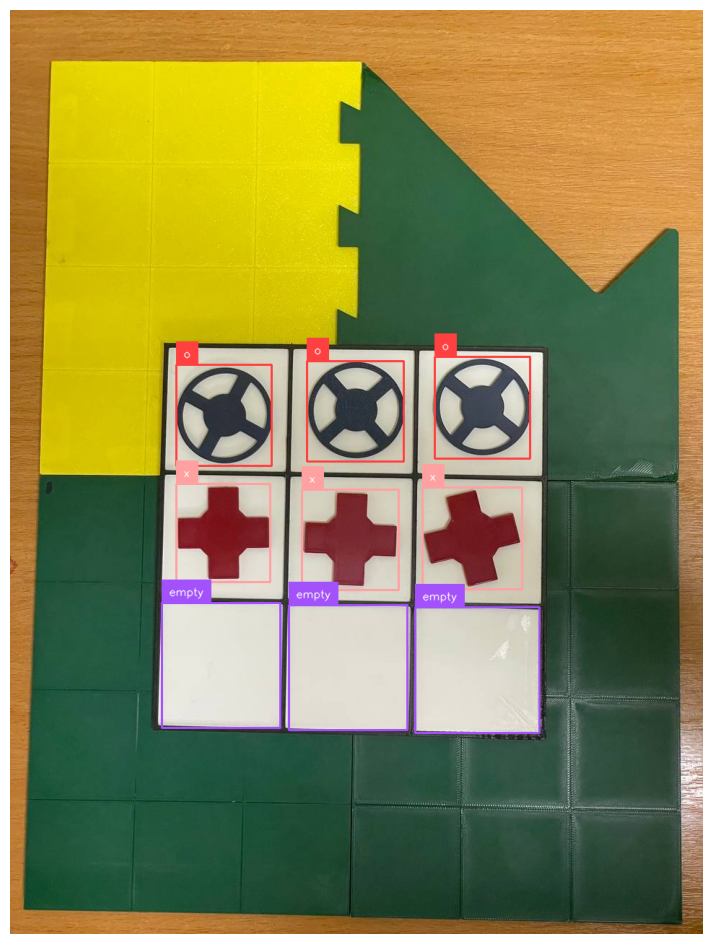

In [10]:
sv.plot_image(annotated_image)